In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Load and preprocess data
train_dir = '/content/drive/MyDrive/bunga/flower/train'
val_dir = '/content/drive/MyDrive/bunga/flower/validation'

In [ ]:
# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Only rescaling for the validation set
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 600 images belonging to 2 classes.


In [ ]:
# Load validation data
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 120 images belonging to 2 classes.


In [ ]:
# Number of classes
num_classes = len(train_generator.class_indices)

In [ ]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model with Adam optimizer and a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model with Adam optimizer
history_adam = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=50
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 322s 12s/step - accuracy: 0.5402 - loss: 3.3629 - val_accuracy: 0.3958 - val_loss: 0.7251
Epoch 2/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 1:11 4s/step - accuracy: 0.7500 - loss: 0.5512

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7500 - loss: 0.5512 - val_accuracy: 1.0000 - val_loss: 0.3872
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step - accuracy: 0.6844 - loss: 0.9227 - val_accuracy: 0.3958 - val_loss: 0.9399
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6250 - loss: 1.2079 - val_accuracy: 1.0000 - val_loss: 0.2034
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 61s 3s/step - accuracy: 0.7419 - loss: 0.6961 - val_accuracy: 0.4896 - val_loss: 0.7254
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 314ms/step - accuracy: 0.7188 - loss: 0.5418 - val_accuracy: 0.9583 - val_loss: 0.3250
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.7979 - loss: 0.4329 - val_accuracy: 0.5000 - val_loss: 0.7120
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7188 - loss: 0.6186 - val_accuracy: 0.9167 - val_loss: 0.3202
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.7623 - loss: 0.5519 - val_accuracy: 0.4896 - val_loss: 0.8264

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 656ms/step - accuracy: 0.9265 - loss: 0.1756
Validation Loss: 0.28117072582244873
Validation Accuracy: 0.8500000238418579


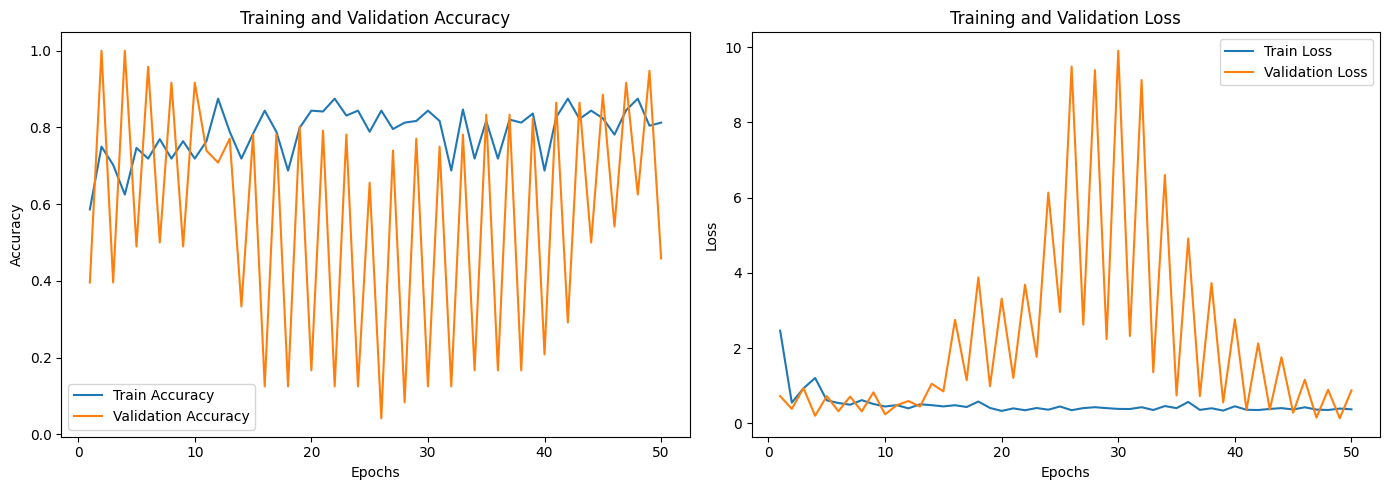

In [ ]:
# Plot accuracy and loss
def plot_accuracy_loss(history):
    epochs = range(1, len(history.history['accuracy']) + 1)

    plt.figure(figsize=(14, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Train Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Train Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call function to plot accuracy and loss
plot_accuracy_loss(history_adam)

In [ ]:
# Generate confusion matrix for validation data
val_generator.reset()
predictions = model.predict(val_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_generator.classes

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 549ms/step


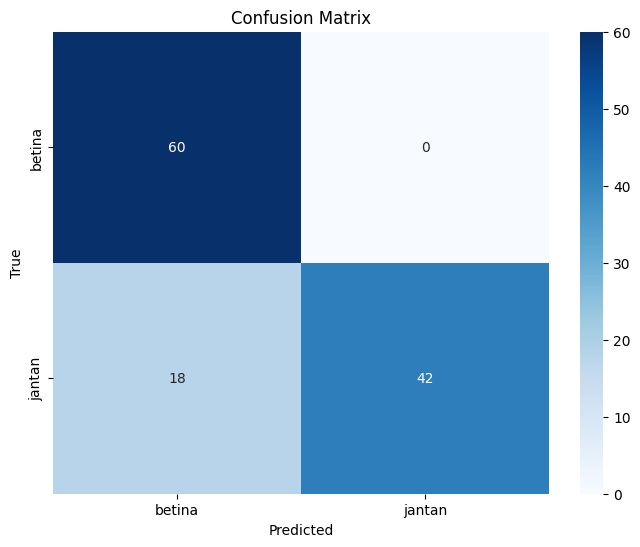

In [ ]:
# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(train_generator.class_indices.keys()), yticklabels=list(train_generator.class_indices.keys()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Classification Report
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_generator.classes
report = classification_report(true_classes, predicted_classes, target_names=list(train_generator.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

      betina       0.77      1.00      0.87        60
      jantan       1.00      0.70      0.82        60

    accuracy                           0.85       120
   macro avg       0.88      0.85      0.85       120
weighted avg       0.88      0.85      0.85       120



In [ ]:
# Save the model
model.save('bunga_cnn_model.h5')

In [ ]:
from google.colab import files
files.download('/content/bunga_cnn_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>